# <div align="center">  Colocalization analysis (using python) of eisosomal proteins in the fungus *Aspergillus nidulans* <div>

<div align="justify">
The plasma membrane (PM) of all cells coordinates a diverse array of functions by segregating different activities into specialized domains or compartments that vary in size, stability and composition  <cite id="tsq5c"><a href="#zotero|927905/C2JLDJ4S">(Lingwood &#38; Simons, 2010)</a></cite>. 
<br> <br/>  
<div align="justify">In the model filamentous fungus <i>Aspergillus nidulans</i>, proteins such as PilA, PilB, AnNce102 and SurG <cite id="lyqfo"><a href="#zotero|927905/333KSNHG">(Vangelatos et al., 2010)</a></cite> are assembled and form tightly packed stable structures in the PM of the fungus, called eisosomes <cite id="e6byi"><a href="#zotero|927905/LTIFT7ZC">(Athanasopoulos et al., 2015)</a></cite>. For additional information about eisosomal proteins in the model fungus <i>A. nidulans</i> please visit Vicky's Sophianopoulou lab <a href="http://bio.demokritos.gr/en/main-page-mmgl">(Microbial Molecular Genetics Laboratory)</a>.

<br> <br/> 
Here, our goal is to investigate, using python, the colocalization <cite id="0269k"><a href="#zotero|927905/28U4KPUY">(Dunn et al., 2011)</a></cite> of fluorescent proteins AnNce102 (with mRFP) and SurG (with GFP) in <i>A. nidulans</i> germlings.
    
### References:    
<!-- BIBLIOGRAPHY START -->
<div class="csl-bib-body">
  <div class="csl-entry"><i id="zotero|927905/LTIFT7ZC"></i>Athanasopoulos, A., Gournas, C., Amillis, S., &#38; Sophianopoulou, V. (2015). Characterization of AnNce102 and its role in eisosome stability and sphingolipid biosynthesis. <i>Scientific Reports</i>, <i>5</i>, 15200. <a href="https://doi.org/10.1038/srep15200">https://doi.org/10.1038/srep15200</a></div>
  <div class="csl-entry"><i id="zotero|927905/28U4KPUY"></i>Dunn, K. W., Kamocka, M. M., &#38; McDonald, J. H. (2011). A practical guide to evaluating colocalization in biological microscopy. <i>American Journal of Physiology-Cell Physiology</i>, <i>300</i>(4), C723–C742. <a href="https://doi.org/10.1152/ajpcell.00462.2010">https://doi.org/10.1152/ajpcell.00462.2010</a></div>
  <div class="csl-entry"><i id="zotero|927905/C2JLDJ4S"></i>Lingwood, D., &#38; Simons, K. (2010). Lipid rafts as a membrane-organizing principle. <i>Science (New York, N.Y.)</i>, <i>327</i>(5961), 46–50. <a href="https://doi.org/10.1126/science.1174621">https://doi.org/10.1126/science.1174621</a></div>
  <div class="csl-entry"><i id="zotero|927905/333KSNHG"></i>Vangelatos, I., Roumelioti, K., Gournas, C., Suarez, T., Scazzocchio, C., &#38; Sophianopoulou, V. (2010). Eisosome organization in the filamentous ascomycete Aspergillus nidulans. <i>Eukaryotic Cell</i>, <i>9</i>(10), 1441–1454. <a href="https://doi.org/10.1128/EC.00087-10">https://doi.org/10.1128/EC.00087-10</a></div>
</div>
<!-- BIBLIOGRAPHY END -->
    
    
 </div>

In [1]:
# import libraries
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from skimage import io, img_as_float,img_as_ubyte,img_as_uint,filters,restoration,measure
from skimage.measure import profile_line
import os
import pandas as pd
from matplotlib_scalebar.scalebar import ScaleBar


<div align="justify">To investigate the intracellular localization of AnNce102 <cite id="6rus8"><a href="#zotero|927905/LTIFT7ZC">(Athanasopoulos et al., 2015)</a></cite> and SurG proteins <cite id="h97q6"><a href="#zotero|927905/333KSNHG">(Vangelatos et al., 2010)</a></cite>, C-terminal fusions of <i>annce102</i> and <i>surg</i> open reading frames with mRFP and GFP, fluorophores were constructed, expressing <i>annce102</i> (and <i>surg</i>) from it's endogenous promoter. Below, representative confocal images of AnNce102/SurG in germlings can be seen.
<div>

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


(648, 648, 3)


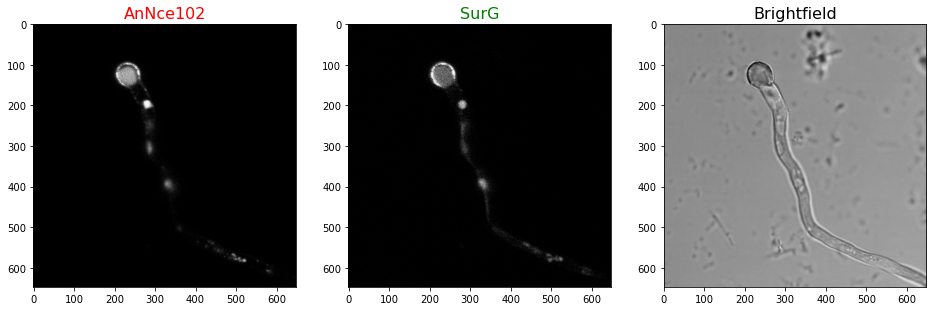

<Figure size 432x288 with 0 Axes>

In [2]:
img = io.imread('surG_nce102 12h 5.tif')
print(img.shape)
img_nce102 = img[:,:,0]
img_surg = img[:,:,1]
img_op = img[:,:,2]

fontsize_title = 16

fig,ax = plt.subplots(1,3, figsize=(16,6))
ax[0].imshow(img_nce102, cmap="gray")
ax[0].set_title("AnNce102", fontsize=fontsize_title,color="r")


ax[1].imshow(img_surg, cmap="gray")
ax[1].set_title("SurG", fontsize=fontsize_title,color="g")


ax[2].imshow(img_op, cmap="gray")
ax[2].set_title("Brightfield", fontsize=fontsize_title)

plt.show()
plt.tight_layout() 

<div align="justify"> AnNce102 and SurG are mostly confined:
<ul>
    <li>to hyphal head (figure A below)</li>
    <li>to vacuoles (figure B below) </li>
    <li>to septa of germlings (data not shown).</li></ul><div>

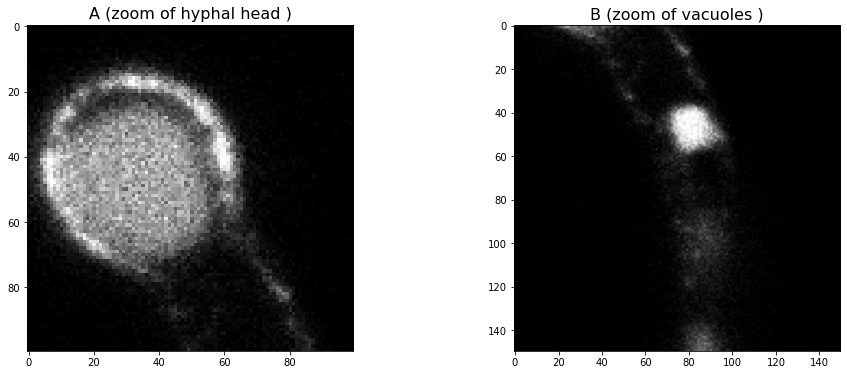

<Figure size 432x288 with 0 Axes>

In [3]:
fig,ax = plt.subplots(1,2, figsize=(16,6))

ax[0].imshow(img_nce102[80:180,200:300], cmap="gray")
ax[0].set_title("A (zoom of hyphal head )", fontsize=fontsize_title)


ax[1].imshow(img_nce102[150:300,200:350], cmap="gray")
ax[1].set_title("B (zoom of vacuoles )", fontsize=fontsize_title)


plt.show()
plt.tight_layout() 

<div align="justify">
    
## Quantifying colocalization
There are many ways to quantify colocalization [see Colocalization](http://bebi103.caltech.edu.s3-website-us-east-1.amazonaws.com/2019a/content/recitations/colocalization.html).

Let's investigate the colocalization* of AnNce102 and SurG. 

## Pearson correlation coefficient (PCC)

Image correlation coefficient-based methods for colocalization analysis give a powerful way to quantify colocalization. The idea is to compute a correlation coefficient for the two images, see [IAFIG-RMS Python for Bioimage Analysis](https://github.com/RMS-DAIM/Python-for-Bioimage-Analysis). 

**The Pearson r, ranges from 1 for two images whose fluorescence intensities are perfectly, linearly related,  to -1 for two images whose fluorescence intensities are perfectly, but inversely, related to one another <cite id="8a4gf"><a href="#zotero|927905/28U4KPUY">(Dunn et al., 2011)</a></cite>**



In [4]:
#Calculate the Pearson's coefficent (rho) for the images.
X = img_nce102.flatten() # Red channel
Y = img_surg.flatten() # Green channel

X_bar = np.average(X)
Y_bar = np.average(Y)

r = np.sum((X-X_bar)*(Y-Y_bar))/(np.sqrt(np.sum((X-X_bar)**2)*(np.sum((Y-Y_bar)**2))))####Insert the remaining code here to finish the equation.
print("The Pearson correlation coefficient has a value of: ",round(r,3), " -  meaning there is colocalization between red and green channel")

The Pearson correlation coefficient has a value of:  0.868  -  meaning there is colocalization between red and green channel


## The Mander's test
Implement the Mander's test and calculate the value for the image*. 
*CHB = CH1 & CH2 (& is the 'and' operator. If a pixel is true in both images, it is true in the output CHB). 
- $$CHB =CH1 + CH2$$  
If a pixel is true in both images, it is true in the output CHB
 <br>
 - $$M1 =\frac{CHB}{CH1}$$  
 <br>
 - $$M2 =\frac{CHB}{CH2}$$

M1, M2 = The Mander's coefficients

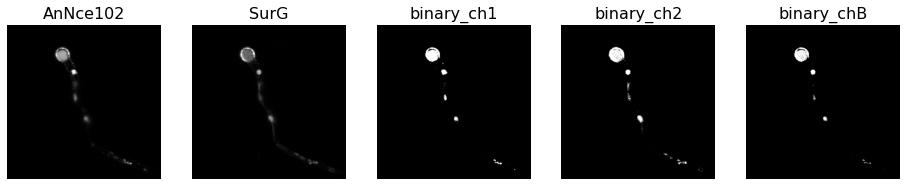

M1 = 0.8703017469560614
M2 = 0.7282392026578073


In [5]:

#Convert image to float.
img_nce102= img_as_float(img_nce102)
img_surg = img_as_float(img_surg)

#Calculate thresholds
thr_ch1 = filters.threshold_otsu(img_nce102)
thr_ch2 = filters.threshold_otsu(img_surg)

#Apply thresholds and generate binary images.
binary_ch1 = img_nce102 > thr_ch1
binary_ch2 = img_surg > thr_ch2

binary_chB = binary_ch1 & binary_ch2


fontsize_title = 16

fig,ax = plt.subplots(1,5, figsize=(16,6))
ax[0].imshow(img_nce102, cmap="gray")
ax[0].axis("off")  #Remove x and y ticks
ax[0].set_title("AnNce102", fontsize=fontsize_title)


ax[1].imshow(img_surg, cmap="gray")
ax[1].axis("off")  #Remove x and y ticks
ax[1].set_title("SurG", fontsize=fontsize_title)


ax[2].imshow(binary_ch1, cmap="gray")
ax[2].axis("off")  #Remove x and y ticks
ax[2].set_title("binary_ch1", fontsize=fontsize_title)

ax[3].imshow(binary_ch2, cmap="gray")
ax[3].axis("off")  #Remove x and y ticks
ax[3].set_title("binary_ch2", fontsize=fontsize_title)

ax[4].imshow(binary_chB, cmap="gray")
ax[4].axis("off")  #Remove x and y ticks

ax[4].set_title("binary_chB", fontsize=fontsize_title)

plt.show()
# plt.tight_layout()


#Calculate the Mander's coefficient for the two channels. Note the formula's above in the description. 
#You will need to sum the pixels in each channel and then divide one by the other using the above formula
M1 = np.sum(binary_chB)/np.sum(binary_ch1)
M2 = np.sum(binary_chB)/np.sum(binary_ch2)

print("M1 =",M1)
print("M2 =",M2)